In [1]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
import statsmodels.api as sm
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adatam=sc.read('../scRNA_paga/state_adata/Quartzseq_minimize.h5ad')
equilibrate_linear_weighted=pickle.load(open('cell_affinity_significance/equilibrate_linear_weighted_adatae_Quartzseq.pkl','rb'))
minimize_linear_weighted=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_adatam_Quartzseq.pkl','rb'))
equilibrate_linear_flat=pickle.load(open('cell_affinity_significance/equilibrate_linear_flat_adatae_Quartzseq.pkl','rb'))
minimize_linear_flat=pickle.load(open('cell_affinity_significance/minimize_linear_flat_adatam_Quartzseq.pkl','rb'))

In [3]:
f_pvals_l1=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_1_pvals.pkl','rb'))
f_padj_l1=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_1_pvals_adj.pkl','rb'))
f_pvals_l2=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_2_pvals.pkl','rb'))
f_padj_l2=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_2_pvals_adj.pkl','rb'))
f_pvals_l3=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_3_pvals.pkl','rb'))
f_padj_l3=pickle.load(open('cell_affinity_significance/Quartzseq_flat_level_3_pvals_adj.pkl','rb'))
w_pvals_l1=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_1_pvals.pkl','rb'))
w_padj_l1=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_1_pvals_adj.pkl','rb'))
w_pvals_l2=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_2_pvals.pkl','rb'))
w_padj_l2=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_2_pvals_adj.pkl','rb'))
w_pvals_l3=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_3_pvals.pkl','rb'))
w_padj_l3=pickle.load(open('cell_affinity_significance/Quartzseq_weighted_level_3_pvals_adj.pkl','rb'))

In [4]:
markers=pd.read_excel("markers_hca.ods", engine="odf",header=2,index_col=None)

# 1) Number of genes
### flat model

(array([2200.,  277.,  241.,  246.,  227.,  201.,  200.,  173.,  140.,
         177.,  147.,  158.,  123.,  152.,  177.,  175.,  201.,  162.,
         190.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

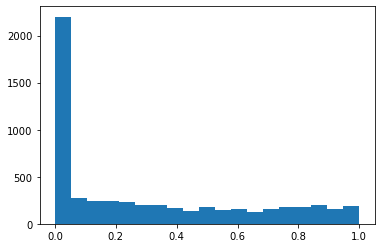

In [10]:
hist(f_padj_l2[:,9],bins=np.linspace(0,1,20))

### weigthed model

(array([2163.,  289.,  250.,  227.,  209.,  232.,  191.,  181.,  154.,
         153.,  165.,  159.,  139.,  145.,  148.,  179.,  190.,  199.,
         194.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

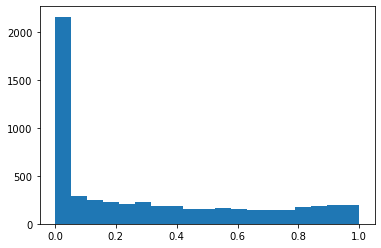

In [11]:
hist(w_padj_l2[:,9],bins=np.linspace(0,1,20))

### scanpy

In [7]:
sc.tl.rank_genes_groups(adatam,groupby='nsbm_level_2',n_genes=-1)

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


(array([1796.,  316.,  246.,  276.,  272.,  237.,  192.,  166.,  140.,
         170.,  175.,  177.,  173.,  179.,  184.,  227.,  209.,  205.,
         226.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

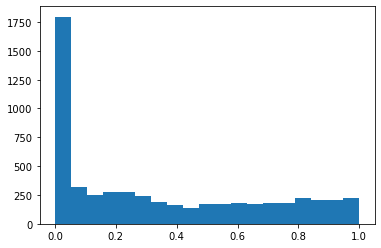

In [9]:
hist([adatam.uns['rank_genes_groups']['pvals_adj'][x][9] for x in range(5566)],bins=np.linspace(0,1,20))

# 2) Markers

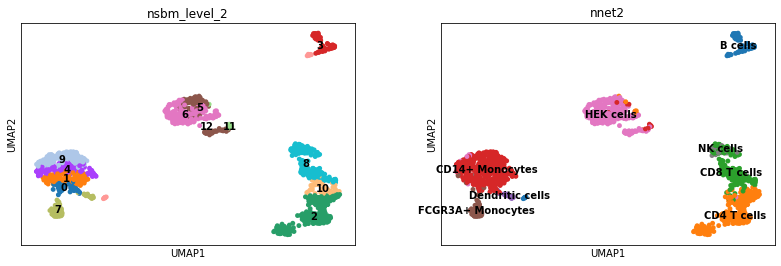

nnet2,B cells,CD4 T cells,CD8 T cells,CD14+ Monocytes,Dendritic cells,FCGR3A+ Monocytes,HEK cells,NK cells
nsbm_level_2,,,,,,,,
0,0,0,0,32,2,5,0,0
1,0,0,0,100,0,2,1,1
2,0,272,4,0,0,0,1,0
3,62,0,0,0,0,0,0,0
4,0,0,0,96,0,2,1,0
5,0,2,0,6,0,0,74,0
6,0,3,0,4,0,0,159,0
7,0,0,0,0,16,55,0,0
8,0,0,140,0,0,0,0,33


In [5]:
sc.pl.umap(adatam, color=['nsbm_level_2','nnet2'],legend_loc='on data')
pd.crosstab(adatam.obs['nsbm_level_2'],adatam.obs['nnet2'])

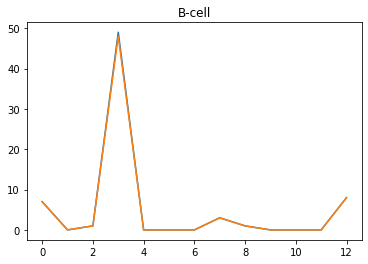

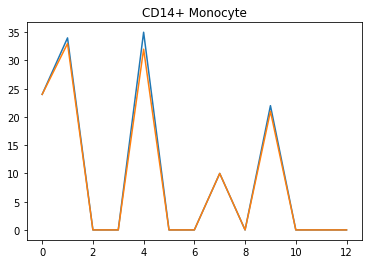

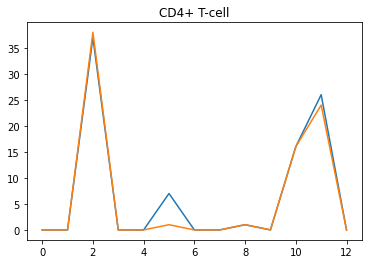

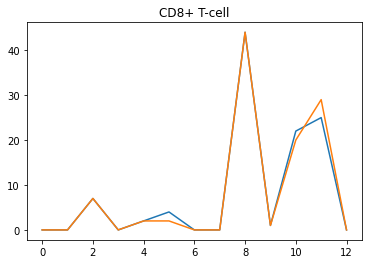

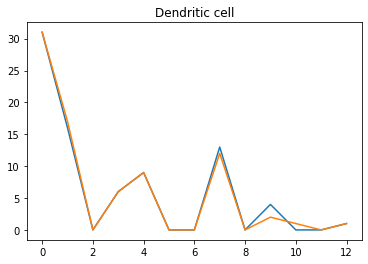

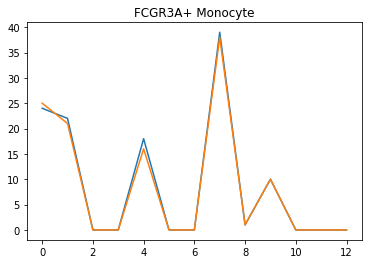

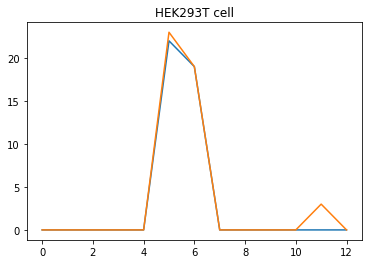

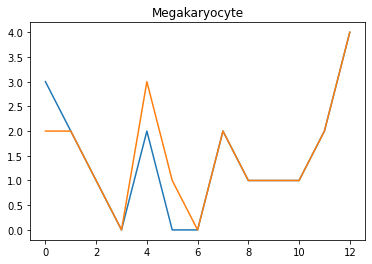

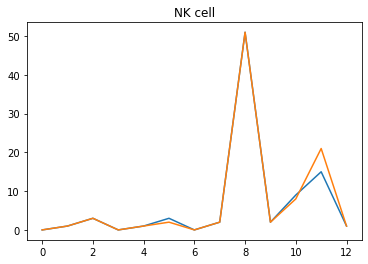

In [12]:
for celltype in range(len(markers.columns)):
    wm=[]
    fm=[]
    flat=0
    weight=0
    gene=[str(i) for i in markers.iloc[:,celltype]]
    for i in adatam.obs['nsbm_level_2'].cat.categories:
        for j in minimize_linear_flat['e0'][i]['gene_names'][:100]:
            if j in gene:
                flat=flat+1
        fm.append(flat)
        flat=0
#        for s in minimize_linear_weighted[i]['gene_names'][:100]:
        for s in minimize_linear_flat['e-5'][i]['gene_names'][:100]:
            if s in gene:
                weight=weight+1
        wm.append(weight)
        weight=0
    figure()
    title(f'{markers.columns[celltype]}')
    plot(fm)
    plot(wm)